# 2.1 Car Price Intro

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

## 2.2 Data Preparation

In [3]:
df = pd.read_csv('/workspaces/ml_zoomcamp/02-regression/data.csv')

In [4]:
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [5]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [6]:
df.columns = df.columns.str.lower().str.replace(" ","_")

In [7]:
str_columns = list(df.dtypes[df.dtypes == 'object'].index)

In [8]:
for col in str_columns:
    df[col] = df[col].str.lower().str.replace(" ","_")

In [9]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


## 2.3 Exploratory Data Analysis

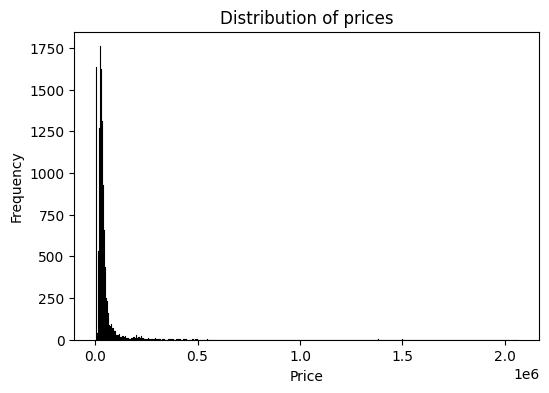

In [10]:
plt.figure(figsize=(6,4))

sns.histplot(df.msrp, bins=400, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')
plt.show()

In [11]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print("")

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

### Distribution of Price

<Axes: xlabel='msrp', ylabel='Count'>

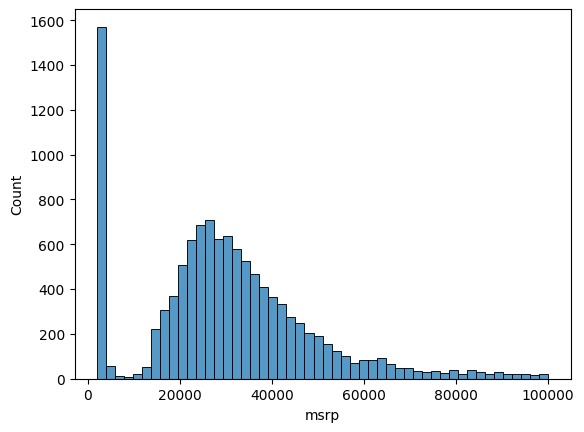

In [12]:
sns.histplot(df.msrp[df.msrp < 100000], bins=50)

In [13]:
np.log1p([0,1,10,100,1000,1000000])

array([ 0.        ,  0.69314718,  2.39789527,  4.61512052,  6.90875478,
       13.81551156])

In [14]:
price_log = np.log1p(df.msrp)

<Axes: xlabel='msrp', ylabel='Count'>

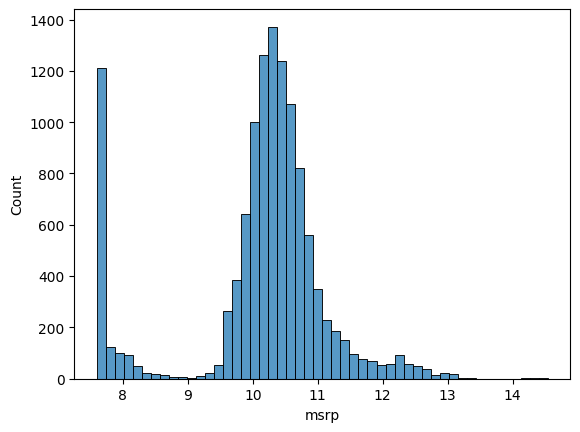

In [15]:
sns.histplot(price_log, bins=50)

### Missing Values

In [16]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

# 2.4 Setting up validation framework

split data into Train, validation, test sets -- Xt,yt; Xv,yv; Xtest,ytest

Train - 60%; Validation - 20%, Test - 20%

In [17]:
n = len(df)
n_val = int(n * .2)
n_test = int(n * .2)
n_train = int(n * .6)

In [18]:
# Check to see if no records were left behind during rounding by int
n,n_val+n_test+n_train

(11914, 11912)

In [19]:
# Missing two records, how do we fix?
# Remove n_val and n_test and whatever remains will be n_train
n = len(df)
n_val = int(n * .2)
n_test = int(n * .2)
n_train = n - n_val - n_test
# Check to see if no records were left behind during rounding by int
n,n_val+n_test+n_train

(11914, 11914)

In [20]:
# Now they are the same, good
n_val,n_test,n_train

(2382, 2382, 7150)

In [21]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [22]:
# How to shuffle
idx = np.arange(n)
idx

array([    0,     1,     2, ..., 11911, 11912, 11913], shape=(11914,))

In [23]:
np.random.seed(2)
np.random.shuffle(idx)

In [24]:
idx

array([2735, 6720, 5878, ..., 6637, 2575, 7336], shape=(11914,))

In [25]:
# Now idx is shuffled index
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [26]:
df_train.reset_index(drop=True)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,54900
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,29215
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,34675
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,303300


In [27]:
df_val.reset_index(drop=True)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,chevrolet,colorado,2015,regular_unleaded,200.0,4.0,automatic,four_wheel_drive,4.0,NaN,compact,extended_cab_pickup,25,19,1385,26885
1,mercedes-benz,e-class,2017,premium_unleaded_(required),241.0,4.0,automatic,all_wheel_drive,4.0,luxury,midsize,sedan,29,22,617,54650
2,ford,focus,2017,flex-fuel_(unleaded/e85),160.0,4.0,manual,front_wheel_drive,4.0,flex_fuel,compact,sedan,36,26,5657,16775
3,acura,tlx,2016,premium_unleaded_(recommended),290.0,6.0,automatic,front_wheel_drive,4.0,luxury,midsize,sedan,34,21,204,42600
4,volkswagen,beetle_convertible,2016,regular_unleaded,170.0,4.0,automatic,front_wheel_drive,2.0,NaN,compact,convertible,34,25,873,25995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2377,volvo,v60,2015,regular_unleaded,240.0,4.0,automatic,front_wheel_drive,4.0,luxury,midsize,wagon,37,25,870,35750
2378,maserati,granturismo_convertible,2015,premium_unleaded_(required),444.0,8.0,automatic,rear_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,convertible,20,13,238,145740
2379,cadillac,escalade_hybrid,2013,regular_unleaded,332.0,8.0,automatic,rear_wheel_drive,4.0,"luxury,hybrid",large,4dr_suv,23,20,1624,74425
2380,mitsubishi,lancer,2016,regular_unleaded,148.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,34,24,436,17595


In [28]:
df_test.reset_index(drop=True)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,gmc,vandura,1994,regular_unleaded,165.0,6.0,automatic,rear_wheel_drive,3.0,NaN,compact,cargo_van,20,15,549,2000
1,mercedes-benz,600-class,1993,regular_unleaded,389.0,12.0,automatic,rear_wheel_drive,2.0,luxury,large,coupe,15,11,617,3211
2,toyota,venza,2013,regular_unleaded,268.0,6.0,automatic,all_wheel_drive,4.0,"crossover,performance",midsize,wagon,25,18,2031,31120
3,volvo,740,1992,regular_unleaded,114.0,4.0,automatic,rear_wheel_drive,4.0,luxury,midsize,sedan,26,18,870,2000
4,ford,crown_victoria,2010,flex-fuel_(unleaded/e85),224.0,8.0,automatic,rear_wheel_drive,4.0,flex_fuel,large,sedan,24,16,5657,29905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2377,chevrolet,chevy_van,1998,regular_unleaded,200.0,6.0,automatic,rear_wheel_drive,3.0,NaN,midsize,cargo_van,18,13,1385,2052
2378,subaru,xv_crosstrek,2014,regular_unleaded,160.0,4.0,automatic,all_wheel_drive,4.0,"crossover,hybrid",compact,4dr_suv,33,29,640,25995
2379,dodge,magnum,2006,regular_unleaded,250.0,6.0,automatic,all_wheel_drive,4.0,NaN,large,wagon,22,15,1851,29100
2380,honda,civic,2016,regular_unleaded,174.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,42,31,2202,22200


In [29]:
# Sanity check length
len(df_train),len(df_test),len(df_val)

(7150, 2382, 2382)

In [30]:
# Extract y_train,y_test,y_val
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [31]:
# Remove target column from data so we don't accidentally use it
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [32]:
df_val

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
2779,chevrolet,colorado,2015,regular_unleaded,200.0,4.0,automatic,four_wheel_drive,4.0,NaN,compact,extended_cab_pickup,25,19,1385
3708,mercedes-benz,e-class,2017,premium_unleaded_(required),241.0,4.0,automatic,all_wheel_drive,4.0,luxury,midsize,sedan,29,22,617
4794,ford,focus,2017,flex-fuel_(unleaded/e85),160.0,4.0,manual,front_wheel_drive,4.0,flex_fuel,compact,sedan,36,26,5657
10498,acura,tlx,2016,premium_unleaded_(recommended),290.0,6.0,automatic,front_wheel_drive,4.0,luxury,midsize,sedan,34,21,204
1880,volkswagen,beetle_convertible,2016,regular_unleaded,170.0,4.0,automatic,front_wheel_drive,2.0,NaN,compact,convertible,34,25,873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11123,volvo,v60,2015,regular_unleaded,240.0,4.0,automatic,front_wheel_drive,4.0,luxury,midsize,wagon,37,25,870
5549,maserati,granturismo_convertible,2015,premium_unleaded_(required),444.0,8.0,automatic,rear_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,convertible,20,13,238
4146,cadillac,escalade_hybrid,2013,regular_unleaded,332.0,8.0,automatic,rear_wheel_drive,4.0,"luxury,hybrid",large,4dr_suv,23,20,1624
6337,mitsubishi,lancer,2016,regular_unleaded,148.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,34,24,436


## 2.5 Linear Regression

In [33]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 7557, dtype: object

In [34]:
# Taking engine_hp, city_mpg, popularity...
# This is our feature matrix
xi = [453,11,86]

In [35]:
w0 = 7.17
w = [0.01,0.04,0.002]

In [36]:
def linear_regression(xi):
    n = len(xi)

    pred = w0

    for j in range(n):
        pred += w[j]*xi[j]
        
    return pred

In [37]:
ans = linear_regression(xi)

In [38]:
np.expm1(ans)

np.float64(222347.2221101062)

## 2.6 Linear Regression Form

In [39]:
# Will generalize to vector form
def dot(xi,w):
    n = len(xi)
    res = 0
    for j in range(n):
        res += xi[j] * w[j]
    return res
'''This uses a for loop, realizing we can use a dot product, we take an initial bias w0 and add it to the dot product of a car's features
and their weights, giving us the below:'''


"This uses a for loop, realizing we can use a dot product, we take an initial bias w0 and add it to the dot product of a car's features\nand their weights, giving us the below:"

In [40]:
def linear_regression(xi):  
    return w0 + dot(xi,w)
''' We can make this even cleaner by merging w0 with the other weights, but we need to add a 1 at x0 for equality, so first we prepend w0
and call it w_new'''

' We can make this even cleaner by merging w0 with the other weights, but we need to add a 1 at x0 for equality, so first we prepend w0\nand call it w_new'

In [41]:
w_new = [w0] + w
w_new

[7.17, 0.01, 0.04, 0.002]

In [42]:
''' Now we can consolidate the return to a dot product by adding 1 to the beginning of xi array'''
def linear_regression(xi):  
    xi = [1] + xi
    return dot(xi,w_new)

In [43]:
'''This worked, but only for one row, or one car in this example.  Next step is to expand xi to X (matrix)'''
linear_regression(xi)

12.312

In [44]:
xi = [453,11,86]
w0 = 7.17
w = [0.01,0.04,0.002]

In [45]:
w_new = [w0] + w
w_new

[7.17, 0.01, 0.04, 0.002]

In [46]:
'''Here we add more rows, with the 1's included at x0, then make a numpy array out of it'''
x1 = [1,148,24,1385]
x2 = [1,132,25,2031]
x3 = [1,453,11,86]

In [47]:
X = [x1,x2,x3]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [48]:
''' Now we recognize that linear regression is simply the dot product of the feature matrix with 1's added at column 0 with w_new'''
X.dot(w_new)

array([12.38 , 13.552, 12.312])

In [49]:
'''Modifying the function to account for the changes:'''
def linear_regression(X):
    return X.dot(w_new) # Matrix-vector multiplication!

In [50]:
linear_regression(X)

array([12.38 , 13.552, 12.312])

## 2.7 Training a linear regression model

w = (X<sup>T</sup>X)<sup>-1</sup>X<sup>T</sup>y

In [51]:
def train_linear_regression(X,y):
    pass


In [52]:
X = [
    [148,24,1385],
    [132,25,2031],
    [453,11,86],
    [158,24,185],
    [172,25,201],
    [413,11,86],
    [38,54,185],
    [142,25,431],
    [453,31,86],
]
X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [53]:
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [54]:
X = np.column_stack([ones,X])
X

array([[1.000e+00, 1.480e+02, 2.400e+01, 1.385e+03],
       [1.000e+00, 1.320e+02, 2.500e+01, 2.031e+03],
       [1.000e+00, 4.530e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 1.580e+02, 2.400e+01, 1.850e+02],
       [1.000e+00, 1.720e+02, 2.500e+01, 2.010e+02],
       [1.000e+00, 4.130e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 3.800e+01, 5.400e+01, 1.850e+02],
       [1.000e+00, 1.420e+02, 2.500e+01, 4.310e+02],
       [1.000e+00, 4.530e+02, 3.100e+01, 8.600e+01]])

In [55]:
XTX = X.T.dot(X) #GRAM Matrix

In [56]:
XTX_inv = np.linalg.inv(XTX)

In [57]:
XTX.dot(XTX_inv)

array([[ 1.00000000e+00, -1.95495204e-18,  6.28430684e-17,
         1.75822864e-18],
       [-9.06380006e-14,  1.00000000e+00,  6.18373354e-15,
         5.01606559e-17],
       [-1.90098479e-13,  7.34292862e-18,  1.00000000e+00,
         2.74699667e-17],
       [-3.38086980e-13, -7.69365108e-16,  1.45868899e-14,
         1.00000000e+00]])

In [58]:
y = [10000,20000,15000,20050,10000,20000,15000,25000,12000]

In [59]:
w_full = XTX_inv.dot(X.T).dot(y)

In [60]:
w0 = w_full[0]
w = w_full[1:]

In [61]:
w0,w

(np.float64(25844.754055766753),
 array([ -16.08906468, -199.47254894,   -1.22802883]))

In [62]:
def train_linear_regression(X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0],w_full[1:]

In [63]:
X = [
    [148,24,1385],
    [132,25,2031],
    [453,11,86],
    [158,24,185],
    [172,25,201],
    [413,11,86],
    [38,54,185],
    [142,25,431],
    [453,31,86],
]
X = np.array(X)
y = [10000,20000,15000,20050,10000,20000,15000,25000,12000]

In [64]:
train_linear_regression(X,y)

(np.float64(25844.754055766753),
 array([ -16.08906468, -199.47254894,   -1.22802883]))

## 2.8 Car price baseline model

In [65]:
# g(X) = y
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [66]:
# use some numerical type columns
base = ['engine_hp','engine_cylinders','highway_mpg', 'city_mpg', 'popularity']
X_train = df_train[base].fillna(0).values
w0, w = train_linear_regression(X_train,y_train)
y_pred = w0 + X_train.dot(w)

<Axes: ylabel='Count'>

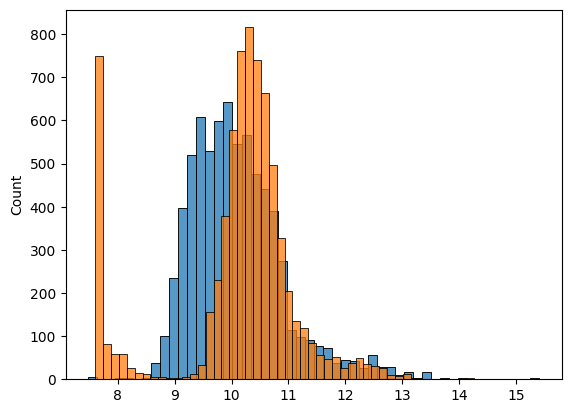

In [67]:
sns.histplot(y_pred, bins=50)
sns.histplot(y_train, bins=50)

## 2.9 RMSE

$g(x_i)$ = prediction for $x_i$

$y_i$ = actual value

RMSE = $\sqrt{1/m\sum_{i=1}^m(g(x_i) - y_i)^2}$

RMSE closer to 1, means model is not a good fit

RMSE closer to 0 means model has less error, therefore a good fit


In [68]:
# y_pred is g(x_i)
# y_train is y_i
def root_mean_square_error(g_xi,y_i):
    pass


In [69]:
diff = (y_pred - y_train)
diff

array([-0.02781925, -0.50032323, -0.22125759, ..., -0.14957294,
       -0.64458959, -0.54198867], shape=(7150,))

In [70]:
squared_diff = np.square(diff)
squared_diff

array([0.00077391, 0.25032334, 0.04895492, ..., 0.02237206, 0.41549575,
       0.29375172], shape=(7150,))

In [71]:
average = np.average(squared_diff)
average

np.float64(0.5706582589712164)

In [72]:
rmse = np.sqrt(average)
rmse

np.float64(0.7554192603920132)

In [73]:
def rmse(g_xi,y_i):
    squared_diff = np.square(g_xi - y_i)
    return np.sqrt(squared_diff.mean())

rmse(y_pred,y_train)

np.float64(0.7554192603920132)

## 2.10 Validating the model

In [74]:
# use some numerical type columns
# Now we take the validation feature matrix X_val and the validation results y_val and apply the weights we came up with in training to 
# the validation sets
base = ['engine_hp','engine_cylinders','highway_mpg', 'city_mpg', 'popularity']
X_train = df_train[base].fillna(0).values
w0, w = train_linear_regression(X_train,y_train)
y_pred = w0 + X_train.dot(w)

In [75]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [76]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train,y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val,y_pred)

np.float64(0.761653099130156)

## 2.11 Simple feature engineering

In [77]:
df['age'] = 2017 - df_train.year

In [78]:
def prepare_X(df):
    df = df.copy()
    df['age'] = 2017 - df.year
    features = base + ['age']
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [79]:
X_train = prepare_X(df_train)

In [80]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [81]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train,y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val,y_pred)

np.float64(0.5172055461058299)

<Axes: ylabel='Count'>

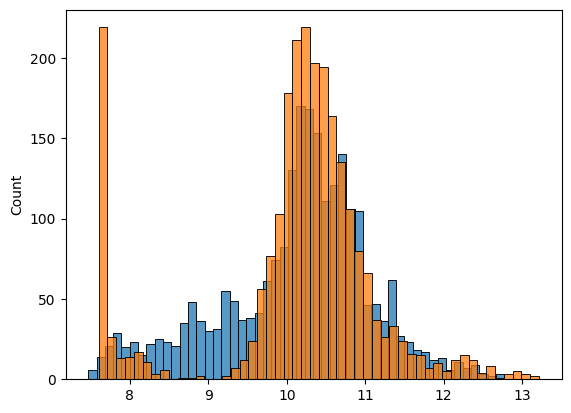

In [82]:
sns.histplot(y_pred, bins=50)
sns.histplot(y_val, bins=50)

## 2.12 Categorical Variables

In [84]:
# Categorical vars are usually strings; non-numericals
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [85]:
df_train.number_of_doors

2735     2.0
6720     4.0
5878     4.0
11190    3.0
4554     4.0
        ... 
434      2.0
1902     2.0
9334     4.0
5284     4.0
2420     4.0
Name: number_of_doors, Length: 7150, dtype: float64

In [88]:
for v in [2,3,4]:
    df_train['num_doors_%s' % v] = (df_train.number_of_doors == v).astype('int')

/tmp/ipykernel_2117/3321434903.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['num_doors_%s' % v] = (df_train.number_of_doors == v).astype('int')
/tmp/ipykernel_2117/3321434903.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['num_doors_%s' % v] = (df_train.number_of_doors == v).astype('int')
/tmp/ipykernel_2117/3321434903.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [89]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,num_doors_2,num_doors_3,num_doors_4
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,1,0,0
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,0,0,1
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,0,0,1
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,0,1,0
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,1,0,0
1902,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,1,0,0
9334,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,0,0,1
5284,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,0,0,1


In [101]:
base

['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

In [119]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    df['age'] = 2017 - df.year
    features.append('age')

    for v in [2,3,4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)
        
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [118]:
prepare_X(df_train)

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [285.,   6.,  22., ...,   0.,   0.,   1.],
       [563.,  12.,  21., ...,   0.,   0.,   1.],
       [200.,   4.,  31., ...,   0.,   0.,   1.]], shape=(7150, 9))

In [120]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train,y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val,y_pred)

np.float64(0.515799564150169)

In [121]:
''' without num doors: 0.5172055461058299, with: 0.515799564150169.  Only a slight improvement.
    let's try to add Make
'''

In [127]:
makes = list(df.make.value_counts().head().index)

In [128]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')

    for v in [2,3,4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)

    for v in makes:
        df['make_%s' % v] = (df.make == v).astype('int')
        features.append('make_%s' % v)
        
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [129]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train,y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val,y_pred)

np.float64(0.5076038849556795)

In [130]:
# 0.515799564150169 from previous run, seeing an improvement

df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [140]:
categorical_vars = ['engine_fuel_type','transmission_type','driven_wheels','market_category','vehicle_size','vehicle_style','make']

In [141]:
categories = {}
for c in categorical_vars:
    categories[c] = list(df[c].value_counts().head().index)

In [142]:
categories

{'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'hatchback',
  'luxury,performance'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback'],
 'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']}

In [143]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')

    for v in [2,3,4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)

    for c, values in categories.items():
        for v in values:
            df['%s_%s' % (c,v)] = (df[c] == v).astype('int')
            features.append('%s_%s' % (c,v))

    
        
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [145]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train,y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val,y_pred)

np.float64(361.03338894022045)

In [148]:
w

array([-2.62461576e+00, -5.01725432e+01, -4.43743962e+01, -1.50199864e+01,
       -1.41335407e-02, -2.74152633e+01, -2.90546391e+04, -2.93484559e+04,
       -2.90129106e+04, -1.16551542e+03, -9.75177709e+02, -1.05990414e+03,
       -1.14794510e+03, -1.32417257e+03,  1.20652009e+17,  1.20652009e+17,
        1.20652009e+17,  1.20652009e+17,  1.20652009e+17,  3.43588833e+16,
        3.43588833e+16,  3.43588833e+16,  3.43588833e+16,  1.55963587e+01,
        2.96905191e+00,  3.55340698e-01, -4.89954110e+01, -8.81772812e+00,
        1.26464706e+02,  1.21203867e+02,  1.48653943e+02, -4.85492239e-02,
        5.44797374e-02,  1.78241160e-01,  3.41906701e-01, -1.64412078e-01,
       -4.23848964e-02,  1.77113119e-01,  1.38350936e-02, -9.97691067e-02,
       -1.07727665e-01])

## 2.13 Regularization


In [150]:
X = [
    [4,4,4],
    [3,5,5],
    [5,1,1],
    [5,4,4],
    [7,5,5],
    [4,5,5],
]
X = np.array(X)
X

array([[4, 4, 4],
       [3, 5, 5],
       [5, 1, 1],
       [5, 4, 4],
       [7, 5, 5],
       [4, 5, 5]])

In [153]:
XTX = X.T.dot(X)

In [154]:
# duplicate columns 1 & 2, so inverse doesn't exist
np.linalg.inv(XTX)

LinAlgError: Singular matrix

In [155]:
# This is not the case in 2.12, however.  Maybe our data isn't as clean?

X = [
    [4,4,4],
    [3,5,5],
    [5,1,1],
    [5,4,4],
    [7,5,5],
    [4,5,5.00000000001], # Adding very small number to one value to make it difference
]
X = np.array(X)
X

array([[4., 4., 4.],
       [3., 5., 5.],
       [5., 1., 1.],
       [5., 4., 4.],
       [7., 5., 5.],
       [4., 5., 5.]])

In [156]:
XTX = X.T.dot(X)

In [158]:
XTX_inv = np.linalg.inv(XTX)

In [159]:
# Just the slight difference makes the matrix not Singular anymore
y = [1,2,3,1,2,3]

In [161]:
w = XTX_inv.dot(X.T).dot(y)
w

array([ 1.89343134e-01, -8.82242188e+02,  8.81968750e+02])

In [173]:
# To solve this problem, we add a small number to the diagonal of XTX
XTX = [
    [1,2,2],
    [2,1,1.0000001],
    [2,1.0000001,1],
]
XTX = np.array(XTX)

In [174]:
np.linalg.inv(XTX)

array([[-3.33333356e-01,  3.33333339e-01,  3.33333339e-01],
       [ 3.33333339e-01, -5.00000008e+06,  4.99999991e+06],
       [ 3.33333339e-01,  4.99999991e+06, -5.00000008e+06]])

In [180]:
XTX = XTX + .1*np.eye(3)

In [181]:
np.linalg.inv(XTX)

array([[-0.37292991,  0.35348805,  0.35348805],
       [ 0.35348805,  4.44736574, -4.64355161],
       [ 0.35348805, -4.64355161,  4.44736574]])

In [182]:
def train_linear_regression_reg(X,y,r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0],w_full[1:]

In [183]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train,y_train,r=0.01)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val,y_pred)

np.float64(0.4565219901360649)

In [184]:
# RMSE is getting lower and lower, so now we find the optimum value of r such that rmse is minimized

## 2.14 Tuning the model

In [186]:
# We use the validation set to tune

for r in [0.0,0.00001,0.0001,0.001,0.1,1,10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train,y_train,r)
    
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val,y_pred)

    print(r,w0,score)

0.0 -1.550108927151725e+17 361.03338894022045
1e-05 8.15395865326669 0.45651699476496055
0.0001 6.303294947496159 0.45651706375189144
0.001 6.285350244364292 0.45651750858685114
0.1 6.191208723398568 0.4565692763023319
1 5.634896667830646 0.45722043179943717
10 4.283980108988667 0.47014569320993477


In [189]:
r = .001

In [190]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train,y_train,r)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val,y_pred)
score

np.float64(0.45651750858685114)

## 2.15 Using the model

In [194]:
# Now we train the final model and use it
# Now we use Train + Val, then final eval on Test set, check RMSE, etc.  Basically duplicating previous efforts with different sets
df_full_train = pd.concat([df_train, df_val])

In [196]:
df_full_train = df_full_train.reset_index(drop=True)

In [197]:
df_full_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527,volvo,v60,2015,regular_unleaded,240.0,4.0,automatic,front_wheel_drive,4.0,luxury,midsize,wagon,37,25,870
9528,maserati,granturismo_convertible,2015,premium_unleaded_(required),444.0,8.0,automatic,rear_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,convertible,20,13,238
9529,cadillac,escalade_hybrid,2013,regular_unleaded,332.0,8.0,automatic,rear_wheel_drive,4.0,"luxury,hybrid",large,4dr_suv,23,20,1624
9530,mitsubishi,lancer,2016,regular_unleaded,148.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,34,24,436


In [198]:
X_full_train = prepare_X(df_full_train)

In [199]:
X_full_train

array([[148.,   4.,  33., ...,   0.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   1.,   0.],
       [148.,   4.,  37., ...,   0.,   0.,   0.],
       ...,
       [332.,   8.,  23., ...,   0.,   0.,   0.],
       [148.,   4.,  34., ...,   0.,   0.,   0.],
       [290.,   6.,  25., ...,   0.,   0.,   0.]], shape=(9532, 41))

In [201]:
y_full_train = np.concatenate([y_train,y_val])

In [202]:
w0, w = train_linear_regression_reg(X_full_train,y_full_train,0.001)

In [203]:
w0

np.float64(6.322768982527974)

In [204]:
w

array([ 1.52506331e-03,  1.18188700e-01, -6.66105576e-03, -5.33413939e-03,
       -4.87603204e-05, -9.69091843e-02, -7.92621233e-01, -8.90862443e-01,
       -6.35101165e-01, -4.66859162e-01,  7.98659233e-02, -3.16047710e-01,
       -5.51981681e-01, -7.89526282e-02,  1.09430576e+00,  9.18998219e-01,
        1.14857563e+00,  2.65171150e+00,  5.08934816e-01,  1.62952674e+00,
        1.53023080e+00,  1.61740953e+00,  1.54540891e+00, -9.70559758e-02,
        3.73062093e-02, -5.81767477e-02, -1.19357178e-02, -2.35940835e-02,
        2.18895259e+00,  2.07458269e+00,  2.05916685e+00, -5.00802769e-02,
        5.62184639e-02,  1.84794024e-01,  3.32646151e-01, -1.58817038e-01,
       -4.14339217e-02,  1.75560742e-01, -5.78065829e-04, -1.00563875e-01,
       -9.27549655e-02])

In [206]:
# prepare test data set to validate
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test,y_pred)
score

np.float64(0.4517749308437982)

In [207]:
# This tells us that we didn't get the rmse score just by chance, but that the weights are sound
# Now let's use it to actually predict a price of a car

In [212]:
car = df_test.iloc[20].to_dict() # We use df_test here because the model was not exposed to these cars during testing, by design
car

{'make': 'toyota',
 'model': 'sienna',
 'year': 2015,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 266.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'large',
 'vehicle_style': 'passenger_minivan',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

In [215]:
df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,toyota,sienna,2015,regular_unleaded,266.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,25,18,2031


In [217]:
X_small = prepare_X(df_small)

In [220]:
y_pred = w0 + X_small.dot(w)
y_pred[0]

np.float64(10.462651695506128)

In [226]:
np.expm1(y_pred[0])

np.float64(34983.195995378424)

In [222]:
df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916
1902,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873
9334,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549
5284,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86


In [223]:
y_test[20]

np.float64(10.463131911491967)

In [225]:
np.expm1(y_test[20])

np.float64(35000.00000000001)